### Using TF like Numpy

* A tensor is very similar to a
NumPy ndarray: it is usually a multidimensional array, but it can also hold
a scalar (a simple value, such as 42).

1. Tensors & Operations:


In [206]:
import tensorflow as tf
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [207]:
t.shape,t.dtype

(TensorShape([2, 3]), tf.float32)

In [208]:
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [209]:
t[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [210]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [211]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [212]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [213]:
tf.constant(42) #shape is empty when holding single scalar value only

<tf.Tensor: shape=(), dtype=int32, numpy=42>

> WARNING
Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This
is because 32-bit precision is generally more than enough for neural networks, plus it
runs faster and uses less RAM. So when you create a tensor from a NumPy array, make
sure to set dtype=tf.float32

3. Type conversions:

In [214]:
# can't add a float tensor and an integer tenseor, nd u can't even add a 32-bit float
# and a 64-bit  float

tf.constant(2.) + tf.constant(40)


InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [ ]:
tf.constant(2.) + tf.constant(40.,dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

Type  Casting

In [ ]:
t2 = tf.constant(40.,dtype=tf.float64)

In [ ]:
tf.constant(2.0) + tf.cast(t2,tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

3. Variables

In [ ]:
v = tf.Variable([[1.,2.,3.],[4.,5.,6.]])
v # tensors are immuatable

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
v.assign(2 * v)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
v[:,2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [ ]:
v.scatter_nd_update(
    indices=[[0,0],[1,2]], updates=[100.,200.]
)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [ ]:
v[1] = [7.,8.,9.]

TypeError: 'ResourceVariable' object does not support item assignment

### Other Data Structures

1. Sparse tensors( tf.SparseTensor):
Efficently represent tensors containing mostly zeros. The tf.sparse
package contains operations for sparse tensors.

2. Tensor arrays(tf.TensorArray):
Are lists of tensors. They have a fixed length by default but can
optionally be made extensible. All tensors they contain must have the
same shape and data type.

3. Ragged tensors (tf.RaggedTensor):
Represent lists of tensors, all of the same rank and data type, but with
varying sizes. The tf.ragged package contains
operations for ragged tensors.

4. String tensors:
regular tensors of type tf.string. These represent byte strings, not
Unicode strings, so if you create a string tensor using a Unicode string
(e.g., a regular Python 3 string like "café"), then it will get encoded to
UTF-8 automatically (e.g., b"caf\xc3\xa9"). Alternatively, you can
represent Unicode strings using tensors of type tf.int32, where each
item represents a Unicode code point (e.g., [99, 97, 102, 233]). The
tf.strings package (with an s) contains ops for byte strings and
Unicode strings (and to convert one into the other). It’s important to
note that a tf.string is atomic, meaning that its length does not appear
in the tensor’s shape. Once you convert it to a Unicode tensor (i.e., a
tensor of type tf.int32 holding Unicode code points), the length
appears in the shape.

5. Sets
Are represented as regular tensors (or sparse tensors).

6. Queues
Store tensors across multiple steps. TensorFlow offers various kinds of
queues.



String Arrays

In [ ]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [ ]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [ ]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [ ]:
b = tf.strings.unicode_encode(u,"UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [ ]:
tf.strings.length(b,unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
tf.strings.unicode_decode(b,"UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [ ]:
p = tf.constant(["Café","Coffee","caffé", "咖啡"])
p

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'Caf\xc3\xa9', b'Coffee', b'caff\xc3\xa9',
       b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [ ]:
tf.strings.length(p,unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [ ]:
r = tf.strings.unicode_decode(p,"UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 233], [21654, 21857]]>

Ragged tensors

In [ ]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101])>

In [ ]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 233]]>

In [ ]:
r2 = tf.ragged.constant([[65,66],[],[67]])
tf.concat([r,r2],axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 233], [21654, 21857], [65, 66], [], [67]]>

In [ ]:
r3 = tf.ragged.constant([[68,69,70],[71],[],[72,73]])
print(tf.concat([r,r3],axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 233], [21654, 21857, 72, 73]]>


In [ ]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   233,     0],
       [21654, 21857,     0,     0,     0,     0]])>

Sparse tensors

In [ ]:
s = tf.SparseTensor(indices=[[0,1],[1,0],[2,3]],
                    values=[1.,2.,3.],
                    dense_shape=[3,4])

tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [ ]:
s * 42.0

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 42.  84. 126.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [ ]:
try:
    s + 42.0
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [ ]:
# extra code – shows how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [ ]:
# extra code – when creating a sparse tensor, values must be given in "reading
#              order", or else `to_dense()` will fail.
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],  # WRONG ORDER!
                     values=[1., 2.],
                     dense_shape=[3, 4])
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense] name: 


In [ ]:
# extra code – shows how to fix the sparse tensor s5 by reordering its values
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

Tensor Arrays

In [ ]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)  # returns (and zeros out!) tf.constant([3., 10.])

In [ ]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [ ]:
# extra code – shows how to disable clear_after_read
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1., 2.]))
array2 = array2.write(1, tf.constant([3., 10.]))
array2 = array2.write(2, tf.constant([5., 7.]))
tensor2 = array2.read(1)  # returns tf.constant([3., 10.])
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [ ]:
# extra code – shows how to create and use a tensor array with a dynamic size
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1., 2.]))
array3 = array3.write(1, tf.constant([3., 10.]))
array3 = array3.write(2, tf.constant([5., 7.]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

Sets

In [ ]:
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
u

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]], shape=(5, 2), dtype=int64), values=tf.Tensor([ 1  5  6  9 11], shape=(5,), dtype=int32), dense_shape=tf.Tensor([1 5], shape=(2,), dtype=int64))

In [ ]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]])>

In [ ]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]])>

In [ ]:
# extra code – shows how to use a different default value: -1 in this case
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]])>

In [ ]:
# extra code – shows how to use `tf.sets.difference()`
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [ ]:
# extra code – shows how to use `tf.sets.difference()`
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [ ]:
# extra code – check whether set1[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

Queues

In [ ]:
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [ ]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

In [ ]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

### Customizing Models & Training Algorithms

1. Custom Loss Functions:

Let us have a regresssion task with a dataset with many outliers or noisy:


> WARNING
For better performance, you should use a vectorized implementation, as in this example.
Moreover, if you want to benefit from TensorFlow’s graph optimization features, you
should use only TensorFlow operations.

In [ ]:
def huber_fn(y_true,y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error,squared_loss,linear_loss)

X_train = tf.constant([[1.,2.,3.],[4.,5.,6.]])
y_train = tf.constant([[2.],[5.]])
X_valid = tf.constant([[2.,3.,4.],[5.,6.,7.]])
y_valid = tf.constant([[3.],[6.]])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[3]))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=huber_fn,
              optimizer="nadam",
)

model.fit(X_train, y_train, epochs=10, 
          validation_data=(X_valid, y_valid))


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.9701 - val_loss: 6.3759
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 4.9296 - val_loss: 6.3407
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 4.9003 - val_loss: 6.3083
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 4.8733 - val_loss: 6.2764
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 4.8467 - val_loss: 6.2442
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 4.8199 - val_loss: 6.2114
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 4.7925 - val_loss: 6.1777
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 4.7645 - val_loss: 6.1433
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 4.7357 - val_loss: 6.1081
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 4.7064 - val_loss: 6.0722


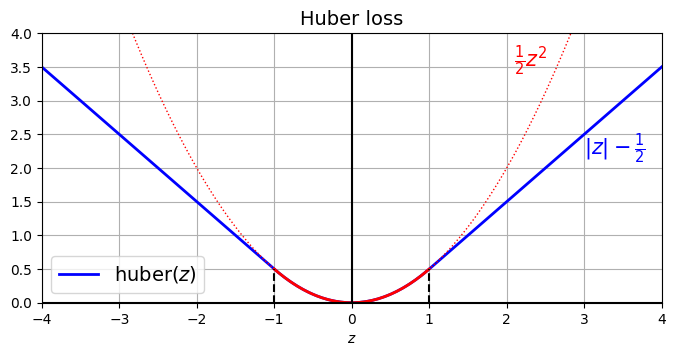

In [ ]:
# extra code – shows what the Huber loss looks like

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

To test our custom loss function, let's create a basic Keras model and train it on the California housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(
    housing.data,housing.target.reshape(-1,1), random_state=(42)
)

X_train,X_valid,y_train,y_valid = train_test_split(
    X_train_full,y_train_full,random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30,activation="relu",
                          kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

model.compile(loss=huber_fn,
              optimizer="nadam",
              metrics=["mae"])

model.fit(X_train_scaled,y_train,epochs=2,
          validation_data = (X_valid_scaled,y_valid))


Epoch 1/2


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7494 - mae: 1.1371 - val_loss: 0.3474 - val_mae: 0.6522
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2607 - mae: 0.5681 - val_loss: 0.2553 - val_mae: 0.5383


### Saving and Loading Models That Contain Custom Components


In [ ]:
# Save the model first
model.save("my_model_with_a_custom_loss.keras")

# Now load the model
loaded_model = tf.keras.models.load_model("my_model_with_a_custom_loss.keras",
                                          custom_objects={"huber_fn": huber_fn})


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


>TIP
If you decorate the huber_fn() function with @keras.utils.
register_keras_serializable(), it will automatically be available to the
load_model() function: there’s no need to include it in the custom_objects dictionary.

In [ ]:
""""With the current implementation, any error between –1 and 1 is considered
“small”. But what if you want a different threshold? One solution is to
create a function that creates a configured loss function:"""
tf.random.set_seed(42)

def create_huber(threshold = 1.0):
    def huber_fn(y_true,y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error,squared_loss,linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0),
              optimizer="nadam")

In [ ]:
"""when you save the model, the threshold will not be saved.
This means that you will have to specify the threshold value when loading
the model (note that the name to use is "huber_fn", which is the name of
the function you gave Keras, not the name of the function that created it):
"""

model.save("my_model_with_a_custom_loss_threshold_2.keras")

model = tf.keras.models.load_model(
    "my_model_with_a_custom_loss_threshold_2.keras",
    custom_objects={"huber_fn":create_huber(2.0)}
)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 11 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self,threshold=1.0,**kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self,y_true,y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
        return tf.where(is_small_error,squared_loss,linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold":self.threshold}

Let’s walk through this code:

* The constructor accepts **kwargs and passes them to the parent
constructor, which handles standard hyperparameters: the name of the
loss and the reduction algorithm to use to aggregate the individual
instance losses. By default this is "AUTO", which is equivalent to
"SUM_OVER_BATCH_SIZE": the loss will be the sum of the instance
losses, weighted by the sample weights, if any, and divided by the
batch size (not by the sum of weights, so this is not the weighted
mean). Other possible values are "SUM" and "NONE".

* The call() method takes the labels and predictions, computes all the
instance losses, and returns them.

* The get_config() method returns a dictionary mapping each
hyperparameter name to its value. It first calls the parent class’s
get_config() method, then adds the new hyperparameters to this
dictionary

In [ ]:
model.compile(loss=HuberLoss(2.),
              optimizer="nadam")

model.save("my_model_with_a_custom_loss_class.keras")

When you save a model, Keras calls the loss instance’s get_config()
method and saves the config in the SavedModel format. When you load the
model, it calls the from_config() class method on the HuberLoss class:
this method is implemented by the base class (Loss) and creates an instance
of the class, passing **config to the constructor.


In [ ]:
"""When you save the model, the threshold will be saved along with it; and
when you load the model, you just need to map the class name to the class
itself:"""

model = tf.keras.models.load_model("my_model_with_a_custom_loss_class.keras",
                            custom_objects={"HuberLoss":HuberLoss})



C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 11 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Custom Activation Functions, Initializers, Regularizers, and Constraints


In [ ]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape,dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape,stddev=stddev,dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0. , tf.zeros_like(weights),weights)

In [ ]:
layer = tf.keras.layers.Dense(1,activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)


If a function has hyperparameters that need to be saved along with the
model, then you will want to subclass the appropriate class, such as
tf.keras.regularizers.Regularizer,
tf.keras.constraints.Constraint, tf.keras.initializers.
Initializer, or tf.keras.layers.Layer (for any layer, including
activation functions).

In [ ]:
""" simple
class for ℓ regularization that saves its factor hyperparameter (this time
you do not need to call the parent constructor or the get_config() method,
as they are not defined by the parent class):"""

class MyL1Regularization(tf.keras.regularizers.Regularizer):
    def __init__(self,factor):
        self.factor = factor

    def __call__(self,weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor":self.factor}

>Note that you must implement the call() method for losses, layers
(including activation functions), and models, or the \__call__() method for
regularizers, initializers, and constraints.

### Custom Metrics

In [ ]:
"""Huber loss function we created earlier as a metric"""

model.compile(loss="mse",
              optimizer="nadam",
              metrics=[create_huber(2.0)]
              )


* Suppose the model made five positive
predictions in the first batch, four of which were correct: that’s 80%
precision. Then suppose the model made three positive predictions in the
second batch, but they were all incorrect: that’s 0% precision for the second
batch. If you just compute the mean of these two precisions, you get 40%.
But wait a second—that’s not the model’s precision over these two batches!
Indeed, there were a total of four true positives (4 + 0) out of eight positive
predictions (5 + 3), so the overall precision is 50%, not 40%.



Streaming metrics

In [ ]:
"""What we need
is an object that can keep track of the number of true positives and the
number of false positives and that can compute the precision based on these
numbers when requested. This is precisely what the
tf.keras.metrics.Precision class does:"""

precision = tf.keras.metrics.Precision()

In [ ]:
precision([0,1,1,1,0,1,0,1],[1,1,0,1,0,1,0,1])


<tf.Tensor: shape=(), dtype=float32, numpy=0.800000011920929>

In [ ]:
precision([0,1,0,0,1,0,1,1],[1,0,1,1,0,0,0,0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

After the first batch, it returns a precision of 80%; then after
the second batch, it returns 50% (which is the overall precision so far, not
the second batch’s precision). This is called a streaming metric (or stateful
metric), as it is gradually updated, batch after batch.


In [ ]:
"""At any point, we can call the result() method to get the current value of
the metric. We can also look at its variables (tracking the number of true
and false positives) by using the variables attribute, and we can reset
these variables using the reset_states() method:
"""

precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [ ]:
precision.variables

[<Variable path=precision_1/true_positives, shape=(1,), dtype=float32, value=[4.]>,
 <Variable path=precision_1/false_positives, shape=(1,), dtype=float32, value=[4.]>]

In [ ]:
precision.reset_state() #both vars get reset to 0.0

In [ ]:
"""If you need to define your own custom streaming metric, create a subclass
of the tf.keras.metrics.Metric class. Here is a basic example that keeps
track of the total Huber loss and the number of instances seen so far. When
asked for the result, it returns the ratio, which is just the mean Huber loss:"""

class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)  # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

Let’s walk through this code:

* The constructor uses the add_weight() method to create the variables
needed to keep track of the metric’s state over multiple batches—in
this case, the sum of all Huber losses (total) and the number of
instances seen so far (count). You could just create variables manually
if you preferred. Keras tracks any tf.Variable that is set as an
attribute (and more generally, any “trackable” object, such as layers or
models).

* The update_state() method is called when you use an instance of
this class as a function (as we did with the Precision object). It
updates the variables, given the labels and predictions for one batch
(and sample weights, but in this case we ignore them).

* The result() method computes and returns the final result, in this
case the mean Huber metric over all instances. When you use the
metric as a function, the update_state() method gets called first,
then the result() method is called, and its output is returned.

* We also implement the get_config() method to ensure the
threshold gets saved along with the model.

* The default implementation of the reset_states() method resets all
variables to 0.0 (but you can override it if needed).

>NOTE
Keras will take care of variable persistence seamlessly; no action is required.



In [ ]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [ ]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [ ]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [ ]:
m.variables

[<Variable path=huber_metric_2/total, shape=(), dtype=float32, value=21.0>,
 <Variable path=huber_metric_2/count, shape=(), dtype=float32, value=3.0>]

In [ ]:
m.reset_state()
m.variables

[<Variable path=huber_metric_2/total, shape=(), dtype=float32, value=0.0>,
 <Variable path=huber_metric_2/count, shape=(), dtype=float32, value=0.0>]

In [ ]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])

model.fit(X_train_scaled, y_train, epochs=2)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - huber_metric_3: 1.0512 - loss: 1.0512
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - huber_metric_3: 0.3170 - loss: 0.3170


In [ ]:
model.save("my_model_with_a_custom_metric.keras")

In [ ]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric.keras",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - huber_metric_3: 0.2612 - loss: 0.2612
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - huber_metric_3: 0.2328 - loss: 0.2328


More simply, we could have created the class like this

In [ ]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

In [ ]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - HuberMetric: 1.0599 - loss: 0.5274
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - HuberMetric: 0.3215 - loss: 0.1598


In [ ]:
(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())

(0.3256884217262268, 0.32568849524955656)

In [ ]:
model.save("my_model_with_a_custom_metric_v2.keras")

In [ ]:
model = tf.keras.models.load_model("my_model_with_a_custom_metric_v2.keras",
                                   custom_objects={"HuberMetric": HuberMetric})

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - HuberMetric: 0.2627 - loss: 0.2262
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - HuberMetric: 0.2298 - loss: 0.1999


When you define a metric using a simple function, Keras automatically
calls it for each batch, and it keeps track of the mean during each epoch,
just like we did manually. So the only benefit of our HuberMetric class is
that the threshold will be saved. But of course, some metrics, like
precision, cannot simply be averaged over batches: in those cases, there’s
no other option than to implement a streaming metric.


### Custom Layers

1. you may simply want to build a very repetitive architecture, in which a
particular block of layers is repeated many times, and it would be
convenient to treat each block as a single layer. For such cases, you’ll want
to build a custom layer.


2. There are some layers that have no weights, such as
tf.keras.layers.Flatten or tf.keras.layers.ReLU. If you want to
create a custom layer without any weights, the simplest option is to write a
function and wrap it in a tf.keras.layers.Lambda layer.

In [ ]:
""" For example, the
following layer will apply the exponential function to its inputs:

The exponential
layer is sometimes used in the output layer of a regression model when the
values to predict have very different scales (e.g., 0.001, 10., 1,000.). 
"""

exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

As you might guess, to build a custom stateful layer (i.e., a layer with
weights), you need to create a subclass of the tf.keras.layers.Layer
class. 

In [ ]:
""" For example, the following class implements a simplified version of
the Dense layer:"""

class MyDense(tf.keras.layers.Layer):
    def __init__(self,units,activation=None,**kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activation.get(activation)

    def build(self,batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1],self.units],
            initializer="glorot_normal")
        
        self.bias = self.add_weight(
            name="bias", shape=[self.units],
            initializer="zeros"
        )

    def call(self,X):
        return self.activation(X @ self.kernel + self.bias)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,'units': self.units,
                "activation":tf.keras.activation.serialize(self.activation)}
    
    
        

Let’s walk through this code:

* The constructor takes all the hyperparameters as arguments (in this
example, units and activation), and importantly it also takes a
**kwargs argument. It calls the parent constructor, passing it the
kwargs: this takes care of standard arguments such as input_shape,
trainable, and name. Then it saves the hyperparameters as attributes,
converting the activation argument to the appropriate activation
function using the tf.keras.activations.get() function (it accepts
functions, standard strings like "relu" or "swish", or simply None).


* The build() method’s role is to create the layer’s variables by calling
the add_weight() method for each weight. The build() method is
called the first time the layer is used. At that point, Keras will know
the shape of this layer’s inputs, and it will pass it to the build()
method, which is often necessary to create some of the weights. For
example, we need to know the number of neurons in the previous layer
in order to create the connection weights matrix (i.e., the "kernel"):
this corresponds to the size of the last dimension of the inputs. At the
end of the build() method (and only at the end), you must call the
parent’s build() method: this tells Keras that the layer is built (it just
sets self.built = True).


* The call() method performs the desired operations. In this case, we
compute the matrix multiplication of the inputs X and the layer’s
kernel, we add the bias vector, and we apply the activation function to
the result, and this gives us the output of the layer.

* The get_config() method is just like in the previous custom classes.
Note that we save the activation function’s full configuration by
calling tf.keras.activations.serialize().



>NOTE
Keras automatically infers the output shape, except when the layer is dynamic (as you
will see shortly). In this (rare) case, you need to implement the
compute_output_shape() method, which must return a TensorShape object.


In [ ]:
"""To create a layer with multiple inputs (e.g., Concatenate), the argument to
the call() method should be a tuple containing all the inputs. To create a
layer with multiple outputs, the call() method should return the list of
outputs."""

"""For example, the following toy layer takes two inputs and returns
three outputs:
"""

class MyMultiLayer(tf.keras.layers.Layer):
    def call(self,X):
        X1,X2 = X
        return X1 + X2, X1 * X2, X1 / X2

This layer may now be used like any other layer, but of course only using
the functional and subclassing APIs, not the sequential API (which only
accepts layers with one input and one output).


In [ ]:
"""If your layer needs to have a different behavior during training and during
testing (e.g., if it uses Dropout or BatchNormalization layers), then you
must add a training argument to the call() method and use this
argument to decide what to do. For example, let’s create a layer that adds
Gaussian noise during training (for regularization) but does nothing during
testing (Keras has a layer that does the same thing,
tf.keras.layers.GaussianNoise):"""

class GaussianNoise(tf.keras.layers.Layer):
    def __init__(self,stddev,**kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self,X,training=False):
        if training:
            noise = tf.random.normal(tf.shape(X),stddev=self.stddev)
            return X + noise
        else: 
            return X

With that, you can now build any custom layer you need! Now let’s look at
how to create custom models.


### Custom MOdels

1. It’s straightforward: subclass the
tf.keras.Model class, create layers and variables in the constructor, and
implement the call() method to do whatever you want the model to do.


For example, suppose we want to build the model represented in Figure 12-3.

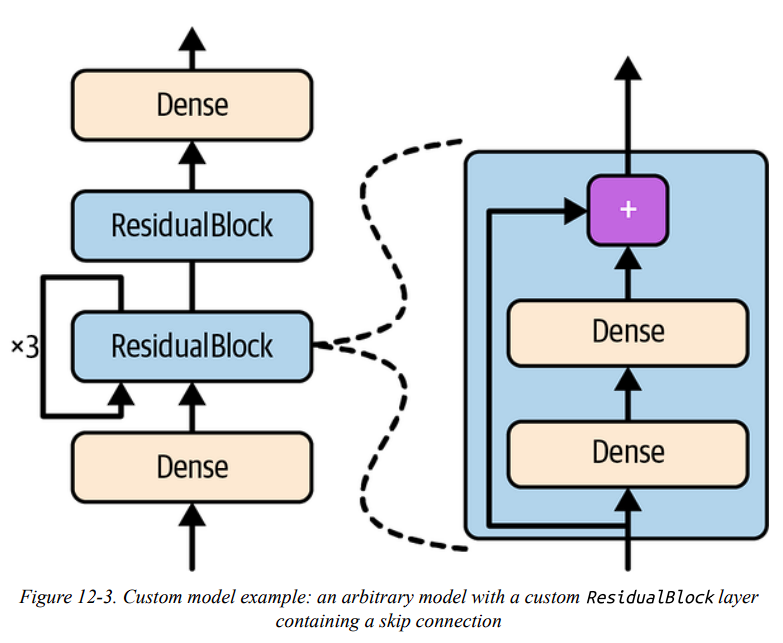


In [ ]:
"""To implement this model, it is best to
first create a ResidualBlock layer, since we are going to create a couple of
identical blocks (and we might want to reuse it in another model):
"""

class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self,n_layers,n_neurons,**kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons,
                                             activation="relu",
                                             kernel_initializer="he_normal")
                        for _ in range(n_layers)]
        
    def call(self,inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [ ]:
"""Next, let’s use the subclassing API to define the model
itself:
"""

class ResidualRegressor(tf.keras.Model):
    def __init__(self,output_dim,**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30,
                                             activaition="relu",
                                             kernel_initializer="he_norma")
        self.block1 = ResidualBlock(2,30)
        self.block2 = ResidualBlock(2,30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self,inputs):
        Z = self.hidden(inputs)
        for _ in range(1 + 3):
            Z = self.block(Z)
        Z = self.block2(Z)
        return self.out(Z)

### Losses and Metrics Based on Model Internals

1. There will be
times when you want to define losses based on other parts of your model,
such as the weights or activations of its hidden layers. This may be useful
for regularization purposes or to monitor some internal aspect of your
model.

2. To define a custom loss based on model internals, compute it based on any
part of the model you want, then pass the result to the add_loss() method.


In [ ]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
            kernel_initializer="he_normal")
        for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(
            name="reconstruction_error")
    
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
    
    def call(self, inputs, training=False):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)


Let’s go through this code:

The constructor creates the DNN with five dense hidden layers and
one dense output layer. We also create a Mean streaming metric to keep
track of the reconstruction error during training.

The build() method creates an extra dense layer that will be used to
reconstruct the inputs of the model. It must be created here because its
number of units must be equal to the number of inputs, and this
number is unknown before the build() method is called.

The call() method processes the inputs through all five hidden
layers, then passes the result through the reconstruction layer, which
produces the reconstruction.

Then the call() method computes the reconstruction loss (the mean
squared difference between the reconstruction and the inputs), and
adds it to the model’s list of losses using the add_loss() method.
Notice that we scale down the reconstruction loss by multiplying it by
0.05 (this is a hyperparameter you can tune). This ensures that the
reconstruction loss does not dominate the main loss.

Next, during training only, the call() method updates the
reconstruction metric and adds it to the model so it can be displayed.
This code example can actually be simplified by calling
self.add_metric(recon_loss) instead: Keras will automatically
track the mean for you.

Finally, the call() method passes the output of the hidden layers to
the output layer and returns its output.




### Computing Gradients Using Autodiff



In [ ]:
def f(w1,w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

* If you know calculus, you can analytically find that the partial derivative of
this function with regard to w1 is 6 * w1 + 2 * w2. You can also find that
its partial derivative with regard to w2 is 2 * w1. For example, at the point
(w1, w2) = (5, 3), these partial derivatives are equal to 36 and 10,
respectively, so the gradient vector at this point is (36, 10). But if this were
a neural network, the function would be much more complex.



In [ ]:
"""One solution
could be to compute an approximation of each partial derivative by
measuring how much the function’s output changes when you tweak the
corresponding parameter by a tiny amount:"""

w1,w2 = 5,3
eps = 1e-6
(f(w1 + eps, w2) - f(w1,w2)) / eps


36.000003007075065

In [ ]:
(f(w1,w2+eps) - f(w1,w2)) / eps

10.000000003174137

In [ ]:
# More Feasible for Neural Networks: use reverse-mode autodiff to compute gradients.
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1,w2)

gradients = tape.gradient(z,[w1,w2])

In [ ]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

>TIP
In order to save memory, only put the strict minimum inside the tf.GradientTape()
block. Alternatively, pause recording by creating a with tape.stop_recording()
block inside the tf.GradientTape() block.

In [ ]:
"""The tape is automatically erased immediately after you call its gradient()
method, so you will get an exception if you try to call gradient() twice:"""

with tf.GradientTape() as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1) # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2) # raises a RuntimeError!

RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

If you need to call gradient() more than once, you must make the tape
persistent and delete it each time you are done with it to free resources:


In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1) # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2) # returns tensor 10.0, works fine now!
del tape


By default, the tape will only track operations involving variables, so if you
try to compute the gradient of z with regard to anything other than a
variable, the result will be None:

In [ ]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2]) # returns [None, None]
gradients

[None, None]

However, you can force the tape to watch any tensors you like, to record
every operation that involves them. You can then compute gradients with
regard to these tensors, as if they were variables:

This can be useful in some cases, like if you want to implement a
regularization loss that penalizes activations that vary a lot when the inputs
vary little: the loss will be based on the gradient of the activations with
14
regard to the inputs. Since the inputs are not variables, you’ll need to tell
the tape to watch them.


In [ ]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In some cases you may want to stop gradients from backpropagating
through some part of your neural network. To do this, you must use the
tf.stop_gradient() function. The function returns its inputs during the
forward pass (like tf.identity()), but it does not let gradients through
during backpropagation (it acts like a constant):

In [ ]:
def f(w1,w2):
    return 3*w1**2 + tf.stop_gradient(2*w1*w2)

with tf.GradientTape() as tape:
    z = f(w1,w2) #the forward pass isn't affected by stop_gradients()

gradients = tape.gradients(z,[w1,w2])

Finally, you may occasionally run into some numerical issues when
computing gradients. For example, if you compute the gradients of the
square root function at x = 10 , the result will be infinite. In reality, the
slope at that point is not infinite, but it’s more than 32-bit floats can handle:

In [ ]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z,[x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

The exponential function is also a frequent source of headaches, as it grows
extremely fast. For example, the way my_softplus() was defined earlier is
not numerically stable

In [ ]:
"""here’s a better
implementation of the my_softplus() function"""

def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0.,z)


In some rare cases, a numerically stable function may still have numerically
unstable gradients. In such cases, you will have to tell TensorFlow which
equation to use for the gradients, rather than letting it use autodiff. For this,
you must use the @tf.custom_gradient decorator when defining the
function, and return both the function’s usual result and a function that
computes the gradients.

In [ ]:
"""For example, let’s update the my_softplus()
function to also return a numerically stable gradients function:
"""

@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads): # grads = backprop'ed from upper layers
        return grads * (1 - 1 / (1 + tf.exp(z))) # stable grads of softplus
    
    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0.,z)
    return result, my_softplus_gradients

### Custom Training Loops

>TIP: TIP
Unless you’re learning or you really need the extra flexibility, you should prefer using
the fit() method rather than implementing your own training loop, especially if you
work in a team.

1. In some cases, the fit() method may not be flexible enough for what you
need to do. For example, the Wide & Deep paper we discussed in
Chapter 10 uses two different optimizers: one for the wide path and the
other for the deep path. Since the fit() method only uses one optimizer
(the one that we specify when compiling the model), implementing this
paper requires writing your own custom loop


In [ ]:
"""First, let’s build a simple model. There’s no need to compile it, since we
will handle the training loop manually:"""

l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30,activation="relu",
                          kernel_initializer = "he_normal",
                          kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1,kernel_regularizer=l2_reg)
])

In [ ]:
"""Next, let’s create a tiny function that will randomly sample a batch of
instances from the training set (in Chapter 13 we will discuss the tf.data
API, which offers a much better alternative):
"""
import numpy as np
def random_batch(X,y,batch_size=32):
    idx = np.random.randint(len(X),size =batch_size)
    return X[idx],y[idx]

In [ ]:
"""Let’s also define a function that will display the training status, including
the number of steps, the total number of steps, the mean loss since the start
of the epoch (we will use the Mean metric to compute it), and other metrics:
"""

def print_status_bar(step,total,loss,metrics=None):
    metrics = " - ".join([f"{m.name}:{m.result():.4f}"
                          for m in [loss] + (metrics or [])])
    
    end =  "" if step < total else '\n'
    print(f"\r{step}/{total} - " + metrics,end=end)

In [ ]:
"""we need to define some
hyperparameters and choose the optimizer, the loss function, and the
metrics"""

n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
mean_loss = tf.keras.metrics.Mean(name="mean_loss")
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [ ]:
"""And now we are ready to build the custom loop!"""

for epoch in range(1,n_epochs + 1):
    print("Epoch {}/{}".format(epoch,n_epochs))
    for step in range(1,n_steps + 1):
        X_batch,y_batch = random_batch(X_train_scaled,y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch,training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch,y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch,y_pred)

        print_status_bar(step,n_steps,mean_loss,metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_state()

Epoch 1/5
362/362 - mean_loss:2.2739 - mean_absolute_error:0.5529
Epoch 2/5
362/362 - mean_loss:1.1609 - mean_absolute_error:0.5027
Epoch 3/5
362/362 - mean_loss:0.8357 - mean_absolute_error:0.4992
Epoch 4/5
362/362 - mean_loss:0.7217 - mean_absolute_error:0.5019
Epoch 5/5
362/362 - mean_loss:0.6566 - mean_absolute_error:0.4976


There’s a lot going on in this code, so let’s walk through it:

* We create two nested loops: one for the epochs, the other for the
batches within an epoch.

* Then we sample a random batch from the training set.

* Inside the tf.GradientTape() block, we make a prediction for one
batch, using the model as a function, and we compute the loss: it is
equal to the main loss plus the other losses (in this model, there is one
regularization loss per layer). Since the mean_squared_error()
function returns one loss per instance, we compute the mean over the
batch using tf.reduce_mean() (if you wanted to apply different
weights to each instance, this is where you would do it). The
regularization losses are already reduced to a single scalar each, so we
just need to sum them (using tf.add_n(), which sums multiple
tensors of the same shape and data type).

* Next, we ask the tape to compute the gradients of the loss with regard
to each trainable variable—not all variables!—and we apply them to
the optimizer to perform a gradient descent step.

* Then we update the mean loss and the metrics (over the current
epoch), and we display the status bar.

* At the end of each epoch, we reset the states of the mean loss and the
metrics.




In [ ]:
"""If you want to apply gradient clipping (see Chapter 11), set the optimizer’s
clipnorm or clipvalue hyperparameter. If you want to apply any other
transformation to the gradients, simply do so before calling the
apply_gradients() method. And if you want to add weight constraints to
your model (e.g., by setting kernel_constraint or bias_constraint
when creating a layer), you should update the training loop to apply these
constraints just after apply_gradients(), like so:"""

for var in model.variables:
    if var.constraint is not None:
        var.assign(var.constraint(var))

>WARNING
Don’t forget to set training=True when calling the model in the training loop,
especially if your model behaves differently during training and testing (e.g., if it uses
BatchNormalization or Dropout). If it’s a custom model, make sure to propagate the
training argument to the layers that your model calls.

### TensorFlow Functions and Graphs


In [ ]:
def cube(x):
    return x ** 3

cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
cube(2)

8

In [ ]:
"""use tf.function() to convert this Python function to a
TensorFlow function:"""
tf_cube = tf.function(cube)
tf_cube

In [ ]:
"""This TF function can then be used exactly like the original Python function,
and it will return the same result (but always as tensors):
"""
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
"""Alternatively, we could have used tf.function as a decorator; this is
actually more common"""

@tf.function
def tf_cube(x):
    return x ** 3

In [ ]:
"""The original Python function is still available via the TF function’s
python_function attribute, in case you ever need it"""

tf_cube.python_function(2)

8

#### TF Functions and concrete functions

In [ ]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function

<ConcreteFunction (x: TensorSpec(shape=(), dtype=tf.float32, name=None)) -> TensorSpec(shape=(), dtype=tf.float32, name=None) at 0x2DB97536650>

In [ ]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [ ]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

#### Exploring Function Definitions and Graphs

In [ ]:
concrete_function.graph

In [ ]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [215]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [216]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [217]:
concrete_function.graph.get_tensor_by_name("Identity:0")

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [218]:
concrete_function.function_def.signature

name: "__inference_cube_381711"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

* TensorFlow optimizes the computation graph, pruning unused nodes,
simplifying expressions (e.g., 1 + 2 would get replaced with 3), and more.
Once the optimized graph is ready, the TF function efficiently executes the
operations in the graph, in the appropriate order (and in parallel when it
can). As a result, a TF function will usually run much faster than the
original Python function, especially if it performs complex computations.

* if you set jit_compile=True when calling tf.function(),
then TensorFlow will use accelerated linear algebra (XLA) to compile
dedicated kernels for your graph, often fusing multiple operations. For
example, if your TF function calls tf.reduce_sum(a * b + c), then
without XLA the function would first need to compute a * b and store the
result in a temporary variable, then add c to that variable, and lastly call
tf.reduce_sum() on the result. With XLA, the whole computation gets
compiled into a single kernel, which will compute tf.reduce_sum(a * b
+ c) in one shot, without using any large temporary variable. Not only will
this be much faster, it will also use dramatically less RAM.

* Keras automatically converts your function into a
TF function—no need to use tf.function().

>TIP
You can tell Keras not to convert your Python functions to TF functions by setting
dynamic=True when creating a custom layer or a custom model. Alternatively, you can
set run_eagerly=True when calling the model’s compile() method.

*  if you pass numerical Python values to a TF function, a
new graph will be generated for every distinct value: for example, calling
tf_cube(10) and tf_cube(20) will generate two graphs.

* a TF function generates a new graph for every unique set of
input shapes and data types(of tensors) and caches it for subsequent calls.

>WARNING
If you call a TF function many times with different numerical Python values, then many
graphs will be generated, slowing down your program and using up a lot of RAM (you
must delete the TF function to release it). Python values should be reserved for
arguments that will have few unique values, such as hyperparameters like the number of
neurons per layer. This allows TensorFlow to better optimize each variant of your
model.



How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [223]:
@tf.function
def tf_cube(x):
    print(f"x = {x}")
    return x ** 3

In [224]:
result = tf_cube(tf.constant(2.0))

x = Tensor("x:0", shape=(), dtype=float32)


In [225]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [226]:
result = tf_cube(2)

x = 2


In [227]:
result = tf_cube(3)

x = 3


In [228]:
result = tf_cube(tf.constant([[1.,2.]])) # New Shape : trace

x = Tensor("x:0", shape=(1, 2), dtype=float32)


In [229]:
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))  # New shape: trace!

x = Tensor("x:0", shape=(2, 2), dtype=float32)


In [230]:
result = tf_cube(tf.constant([[7., 8.], [9., 10.]]))  # Same shape: no trace

It is also possible to specify a particular input signature:

In [231]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)  # extra code to show when tracing happens
    return images[:, ::2, ::2] # drop half the rows and columns

In [232]:
tf.keras.utils.set_random_seed(42)

In [233]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)  # Works fine, traces the function
preprocessed_images = shrink(img_batch_2)  # Works fine, same concrete function

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [234]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # TypeError! Incompatible inputs
except TypeError as ex:
    print(ex)

Binding inputs to tf.function failed due to `Can not cast TensorSpec(shape=(2, 2, 2), dtype=tf.float32, name=None) to TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)`. Received args: (<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[0.7413678 , 0.62854624],
        [0.01738465, 0.3431449 ]],

       [[0.51063764, 0.3777541 ],
        [0.07321596, 0.02137029]]], dtype=float32)>,) and kwargs: {} for signature: (images: TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)).


### AutoGraph and Tracing:

1. So how does TensorFlow generate graphs?

* It starts by analyzing the Python
function’s source code to capture all the control flow statements, such as
for loops, while loops, and if statements, as well as break, continue,
and return statements.(1st step known as AutoGraph).

* After analyzing the
function’s code, AutoGraph outputs an upgraded version of that function in
which all the control flow statements are replaced by the appropriate
TensorFlow operations, such as tf.while_loop() for loops and
tf.cond() for if statements.

* Next, TensorFlow calls this “upgraded” function, but instead of passing the
argument, it passes a symbolic tensor—a tensor without any actual value,
only a name, a data type, and a shape.

*  The
function will run in graph mode, meaning that each TensorFlow operation
will add a node in the graph to represent itself and its output tensor(s) (as
opposed to the regular mode, called eager execution, or eager mode).

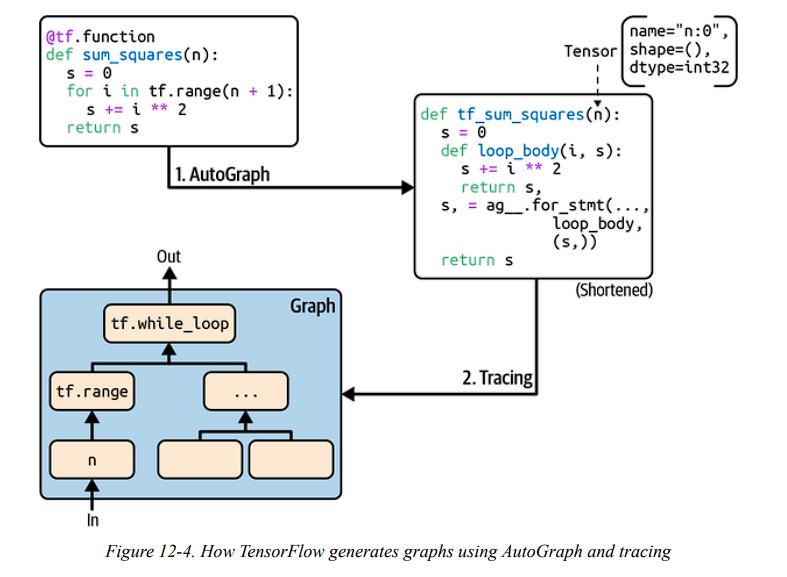

> TIP
In order to view the generated function’s source code, you can call
tf.autograph.to_code(sum_squares.python_function). The code is not meant to
be pretty, but it can sometimes help for debugging.




#### Using AutoGraph to capture Control FLow

In [ ]:
# A static for loop using range:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [237]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [239]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [240]:
#  A "dynamic" loop using tf.while_loop()

@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i,10)
    body = lambda i, x: (tf.add(i,1),tf.add(x,1))
    final_i, final_x = tf.while_loop(condition,body,[tf.constant(0),x])
    return final_x

In [241]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [242]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [243]:
# A "dynamic" for loop using tf.range() (captured by autograph):

@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

In [244]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

#### Handling Vars and Other Resources in TF Functions

In [247]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

increment(counter)  # counter is now equal to 1
increment(counter)  # counter is now equal to 2
increment(counter) # counter is now equal to 3

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [248]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [249]:
counter = tf.Variable(0)
@tf.function
def increment(c=1):
    return counter.assign_add(c)

increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [250]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [251]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self,c=1):
        return self.counter.assign_add(c)
    
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [252]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            x, = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [255]:
# extra code – shows how to display the autograph code with syntax highlighting
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown(f'```python\n{code}\n```'))

display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            x, = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### Using TF Functions with tf.keras (or Not)

By default, tf.keras will automatically convert your custom code into TF Functions, no need to use tf.function():

In [256]:
# Custom loss function
def my_mse(y_true,y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [257]:
# custom metric function
def my_mae(y_true,y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [263]:
# Custom layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [264]:
tf.keras.utils.set_random_seed(42)

In [265]:
# Custom model
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [266]:
model.compile(loss=my_mse,
              optimizer="nadam",
              metrics=[my_mae])

model.fit(X_train_scaled,y_train,epochs=2,
          validation_data=(X_valid_scaled,y_valid))


Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9733 - my_mae: 1.3045Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.9521 - my_mae: 1.2979 - val_loss: 0.4396 - val_my_mae: 0.4727
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4711 - my_mae: 0.4937 - val_loss: 0.4665 - val_my_mae: 0.4480


In [267]:
model.evaluate(X_test_scaled,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4162 - my_mae: 0.4560


[0.41415703296661377, 0.4553782045841217]

In [268]:
tf.keras.utils.set_random_seed(42)

In [269]:
model = MyModel()
model.compile(loss=my_mse,
              optimizer="nadam",
              metrics=[my_mae],
              run_eagerly=True)

model.fit(X_train_scaled[:64],y_train[:64],epochs=1,
          validation_data=(X_valid_scaled,y_valid),
          verbose=0)


Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyD

In [272]:
model.evaluate(X_test_scaled[:64],y_test[:64],verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.545090198516846, 2.0603599548339844]

### Custom Optimizers

The Keras API to create a custom optimizer has changed since Keras 3, so if you need to create one, I recommend you draw inspiration from the source code of one of Keras's builtin optimizers, such as [SGD](https://github.com/keras-team/keras/blob/b083f2e95d4d6b09f6ec22717fd1becccbdbcec1/keras/src/optimizers/sgd.py#L7)